## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>


In [134]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 12, 'max_rows', 30)
#%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [56]:
data = pd.read_csv("../../titanic_train.csv", index_col="PassengerId")

In [57]:
data

,Unnamed: 0,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,0,3,"Braund, ...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,"Cumings,...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,2,1,3,Heikkine...,female,26.0,0,0,STON/O2....,7.9250,NaN,S
4,3,1,1,Futrelle...,female,35.0,1,0,113803,53.1000,C123,S
5,4,0,3,"Allen, M...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,886,0,2,Montvila...,male,27.0,0,0,211536,13.0000,NaN,S
888,887,1,1,"Graham, ...",female,19.0,0,0,112053,30.0000,B42,S
889,888,0,3,Johnston...,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [18]:
data.head(5)

,Unnamed: 0,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,0,3,"Braund, ...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,"Cumings,...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,2,1,3,Heikkine...,female,26.0,0,0,STON/O2....,7.9250,NaN,S
4,3,1,1,Futrelle...,female,35.0,1,0,113803,53.1000,C123,S
5,4,0,3,"Allen, M...",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [61]:
data[(data["Embarked"] == "C") & (data.Fare > 400)]

,Unnamed: 0,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
259,258,1,1,"Ward, Mi...",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,679,1,1,"Cardeza,...",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,737,1,1,"Lesurer,...",male,35.0,0,0,PC 17755,512.3292,B101,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [45]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Unnamed: 0,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
259,258,1,1,"Ward, Mi...",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,679,1,1,"Cardeza,...",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,737,1,1,"Lesurer,...",male,35.0,0,0,PC 17755,512.3292,B101,C
312,311,1,1,"Ryerson,...",female,18.0,2,2,PC 17608,262.3750,B57 B59 ...,C
743,742,1,1,"Ryerson,...",female,21.0,2,2,PC 17608,262.3750,B57 B59 ...,C


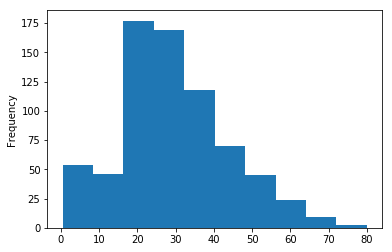

In [172]:
age = data['Age']
age.plot(kind = 'hist')

In [129]:
data.select_dtypes(include='object').head()

,Name,Gender,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, ...",male,A/5 21171,NaN,S
2,"Cumings,...",female,PC 17599,C85,C
3,Heikkine...,female,STON/O2....,NaN,S
4,Futrelle...,female,113803,C123,S
5,"Allen, M...",male,373450,NaN,S


In [130]:
data.select_dtypes(exclude='object').head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,0,3,22.0,1,0,7.2500
2,1,1,1,38.0,1,0,71.2833
3,2,1,3,26.0,0,0,7.9250
4,3,1,1,35.0,1,0,53.1000
5,4,0,3,35.0,0,0,8.0500


In [132]:
data.filter(like='Na').head()

,Name
PassengerId,
1,"Braund, ..."
2,"Cumings,..."
3,Heikkine...
4,Futrelle...
5,"Allen, M..."


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Unnamed: 0    891 non-null int64
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Gender        891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


In [135]:
cols = ['Name', 'Age',
        'Survived']
data.filter(items=cols).head(300)

,Name,Age,Survived
PassengerId,,,
1,"Braund, ...",22.0,0
2,"Cumings,...",38.0,1
3,Heikkine...,26.0,1
4,Futrelle...,35.0,1
5,"Allen, M...",35.0,0
6,"Moran, M...",NaN,0
7,McCarthy...,54.0,0
8,"Palsson,...",2.0,0
9,"Johnson,...",27.0,1


In [165]:
data.filter(regex=r'\d').head()

,Unnamed: 0
PassengerId,
1,0
2,1
3,2
4,3
5,4


In [144]:
data.min()

Unnamed: 0              0
Survived                0
Pclass                  1
Name          Abbing, ...
Gender             female
Age                  0.42
SibSp                   0
Parch                   0
Ticket             110152
Fare                    0
dtype: object

In [146]:
data.isnull().sum().sum()

866

In [147]:
data.groupby('Gender').size()

Gender
female    314
male      577
dtype: int64

In [123]:
data.isnull().get_dtype_counts()

bool    12
dtype: int64

**Пример создания признака.**

In [168]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [169]:
age_categories = [age_category(age) for age in data.Age]

In [170]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [171]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [148]:
# Ваш код здесь
filt = data['Gender'] == 'female'
data.loc[filt, 'Gender'].size


314

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [149]:
# Ваш код здесь
data[data['Gender']=='male']['Pclass'].value_counts()[2]

108

In [150]:
data.groupby(['Pclass','Gender']).size()

Pclass  Gender
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [ ]:
filt = (data['Gender'] == 'male')
data[filt].groupby(by = 'Pclass').size()[2]

**3. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [151]:
# Ваш код здесь
age_series=data[data['Survived']==1].groupby('Age').size()
print(age_series[age_series.index<=30].sum()/age_series.sum())
print(age_series[age_series.index>=60].sum()/age_series.sum())

0.5724137931034483
0.02413793103448276


In [177]:
print(data[(data['Survived']==1)&(data['Age']<30)]['Age'].count()/data[data['Age']<30]['Age'].count()*100)
print(data[(data['Survived']==1)&(data['Age']>60)]['Age'].count()/data[data['Age']>60]['Age'].count()*100)

40.625
22.727272727272727


In [152]:
print(data[data['Age'] <= 30].groupby(['Survived']).size())
print(data[data['Age'] >= 60].groupby(['Survived']).size())


Survived
0    243
1    166
dtype: int64
Survived
0    19
1     7
dtype: int64


In [158]:
survYoung = data['Survived'][(data['Age'] < 30) & (data['Survived'] == 1)].size
survPerc = survYoung/data['Survived'][data['Survived'] == 1].size*100
print(survYoung)
print(survPerc)


156
45.614035087719294


In [156]:
filt = (data['Survived'] == 1)
survived_num = data[filt].size
print(f'All survived: {survived_num}')
filt = ((data['Survived'] == 1) & (data["Age"] < 30))
print(f"Young: {data.loc[filt, 'Age'].size/survived_num}")
filt = ((data['Survived'] == 1) & (data["Age"] > 60))
print(f"Old: {data.loc[filt, 'Age'].size/survived_num}")

All survived: 4104
Young: 0.038011695906432746
Old: 0.0012183235867446393


**4. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [160]:
# Ваш код здесь
g=data.groupby(['Gender','Survived']).size()
print(g['female',1].sum()/g['female'].sum())
print(g['male',1].sum()/g['male'].sum())


0.7420382165605095
0.18890814558058924


**5. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [16]:
# Ваш код здесь

**6. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [17]:
# Ваш код здесь

**7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [18]:
# Ваш код здесь

**8. Опредлите количество выживших представителей 2-го класса.** 
Результат группировать:
<li>по половому признаку
<li> по возрастной категории: совершенолетние и несовершенолетние</li>
Прим.: совершенолетними считать пассажиров, достигших 18-летнего возраста

In [ ]:
# Ваш код здесь